In [1]:
from astropy.table import Table

#import numpy.ma as ma
import numpy as np

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

from marvin import config
config.setRelease('DR16')

from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

import numpy as np
'''
import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')
from mapSmoothness_functions import how_smooth
''';

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /Users/kellydouglass/Documents/Research/data/SDSS/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/kellydouglass/Documents/Research/data/SDSS/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


# Data

In [2]:
data_directory = '../spirals/'

data_filename = 'Pipe3D-master_file_vflag_BB_minimize_chi10_smooth2p27_mapFit_N2O2_HIdr2_noWords_v5.txt'

data = Table.read(data_directory + data_filename, format='ascii.commented_header')

[WARNING]: OverflowError converting to FloatType in column avg_alpha, possibly resulting in degraded precision. (AstropyWarning)
[WARNING]: OverflowError converting to FloatType in column pos_alpha, possibly resulting in degraded precision. (AstropyWarning)
[WARNING]: OverflowError converting to FloatType in column neg_alpha, possibly resulting in degraded precision. (AstropyWarning)


## Select only the galaxies with successful fits

In [3]:
bad_boolean = np.logical_or.reduce([data['M90_map'] == -99, 
                                    data['M90_disk_map'] == -99, 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998])

good_data = data[~bad_boolean]

## Select only the red sequence galaxies

In [4]:
RS_boolean = good_data['CMD_class'] == 3

RS_data = good_data[RS_boolean]

In [55]:
RS_data[43]#.show_in_notebook()

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,ba_map,ba_err_map,phi_map,phi_err_map,Vsys_map,Vsys_err_map,x0_map,x0_err_map,y0_map,y0_err_map,Vmax_map,Vmax_err_map,alpha_map,alpha_err_map,Rturn_map,Rturn_err_map,M90_map,M90_err_map,Sigma_disk_map,Sigma_disk_err_map,Rdisk_map,Rdisk_err_map,M90_disk_map,M90_disk_err_map,DRP_map_smoothness,NSA_elpetro_th90,chi2_map,chi2_disk_map,logHI,WF50,WP20,CMD_class,map_fit_flag,imc,aimc,cd
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
8716,1901,1870,171,53383,401175,119.77969316177088,52.74717543606159,0.5036224126815796,132.85317993164062,0.0191813874989748,954254016.0,1.0,154.36101025976038,6.8935966583378505,53.525986936796215,36.68182556922219,61.44682334142099,19.353911336018214,6.407462064695492,51.31864473897451,169.15021730970287,7.937882002565254,286.10206619514815,2.3288202313103263,37.48873768826606,23.951887870427935,598.2506175144711,0.03528278321027756,0.0012193508542467,169961296.0603409,112537516.44234562,-1142678500.431795,112537516.44234562,1312639796.4921358,-0.8705194703721912,0.08573373803162751,-16.80373191833496,1.8607043019010077,0.632639329154276,0.6581808565460746,1.0087549538011327,1.9222640975928502,0.9622535851396773,-99.0,-99.0,2.0,-99,2,30.723411670710494,3.968941001282627,299.12530875723553,1776322,-99.0,2.068,0.09983079526226735,1.9515227961397512,0.12948052962780882,0.08573373803162751,2.470874757695019,320.21421839348614,481.0823159787887,-5.8444496563015305,0.9943634805390869,0.997398383900889,171.42102439617514,22.085903049021752,16.809215323448697,6.802375919507664,15.116521403252221,3.0391876246819507,10.722365463986117,3.145349716104808,269.75503080798023,181.35655454383044,7.0697408282551955,13.473563114108359,0.37671745737887075,0.4996591393113641,10.699617998026909,10.82821169723098,382.3251429284144,12.741172142387818,0.7418973910531824,0.02347128461693304,9.121296357947081,10.657164757217208,1.6269449643105849,10.616060256958008,8.301792852040878,12353140.390210796,-999.0,-9231.937598385326,-9231.937598385326,3,-1.0,1.0,2.0,0.054


# Marvin

9491-3704


<IPython.core.display.Javascript object>


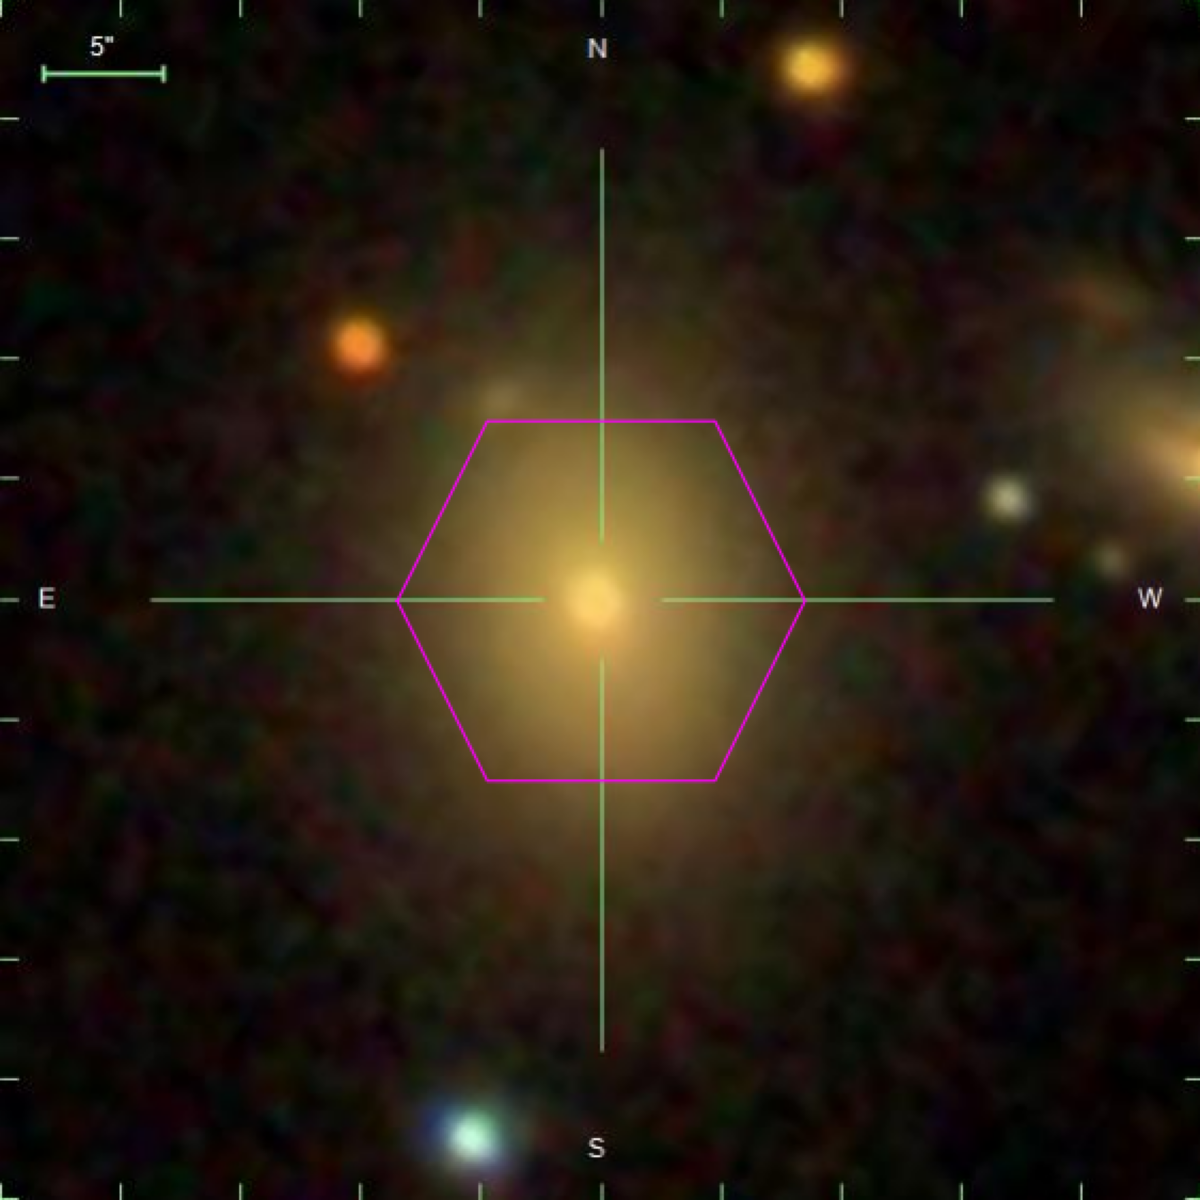

<IPython.core.display.Javascript object>

In [72]:
i = 56

gal_ID = str(RS_data['MaNGA_plate'][i]) + '-' + str(RS_data['MaNGA_IFU'][i])

print(gal_ID)

image = Image(plateifu=gal_ID)
maps = Maps(plateifu=gal_ID)

#plt.figure(figsize=(12,5))

#plt.subplot(121)
image.plot()

#plt.subplot(122)
ha_vel = maps.emline_gval_ha_6564
ha_vel.plot();

# Redshift distribution

How does the redshift distribution of the RS galaxies compare with the total sample?

In [66]:
z_bins = np.arange(0,0.1,0.001)

plt.figure()

plt.hist(good_data['NSA_redshift'], bins=z_bins, color='lightgrey')
plt.hist(RS_data['NSA_redshift'], bins=z_bins, color='r', alpha=0.5)

plt.xlabel('redshift')
plt.ylabel('number of galaxies')

plt.tight_layout();

<IPython.core.display.Javascript object>